# Mushroom Classification

Attribute Information: 

(classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Importing Libraries

In [20]:
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
# from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [6]:
dataset=pd.read_csv('mushroom_dataset/mushrooms.csv')
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
print(dataset.value_counts(subset='cap-shape'))
print(dataset.value_counts(subset='cap-surface'))
print(dataset.value_counts(subset='cap-color'))
print(dataset.value_counts(subset='bruises'))
print(dataset.value_counts(subset='odor'))
print(dataset.value_counts(subset='gill-attachment'))
print(dataset.value_counts(subset='gill-spacing'))
print(dataset.value_counts(subset='gill-size'))
print(dataset.value_counts(subset='gill-color'))
print(dataset.value_counts(subset='stalk-shape'))
print(dataset.value_counts(subset='stalk-root'))
print(dataset.value_counts(subset='stalk-surface-above-ring'))
print(dataset.value_counts(subset='stalk-surface-below-ring'))
print(dataset.value_counts(subset='veil-type'))
print(dataset.value_counts(subset='veil-color'))
print(dataset.value_counts(subset='ring-number'))
print(dataset.value_counts(subset='ring-type'))
print(dataset.value_counts(subset='spore-print-color'))
print(dataset.value_counts(subset='population'))
print(dataset.value_counts(subset='habitat'))
print(dataset.value_counts(subset='class'))


cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
bruises
f    4748
t    3376
Name: count, dtype: int64
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
gill-attachment
f    7914
a     210
Name: count, dtype: int64
gill-spacing
c    6812
w    1312
Name: count, dtype: int64
gill-size
b    5612
n    2512
Name: count, dtype: int64
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
stalk-shape
t    4608
e    3516
Name: count, dtype: int64
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64
stalk-surface-above-ring
s    5176
k

## Analysing the data

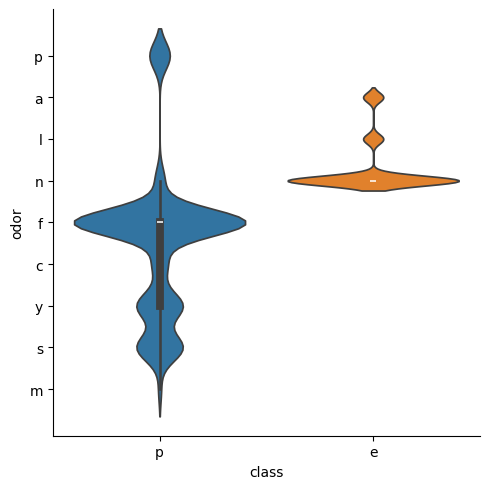

In [8]:
sns.catplot(data=dataset,x='class',y='odor',kind='violin',hue='class')

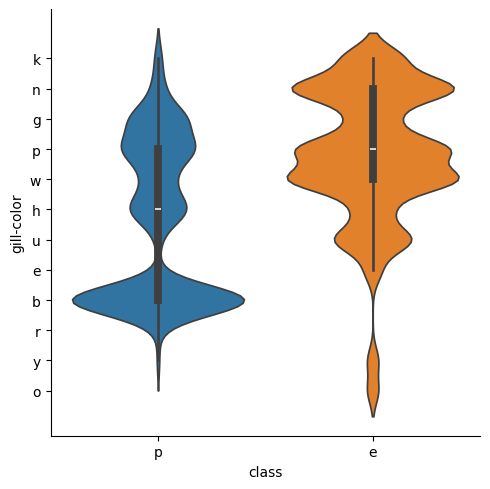

In [9]:
sns.catplot(data=dataset,x='class',y='gill-color',kind='violin',hue='class')

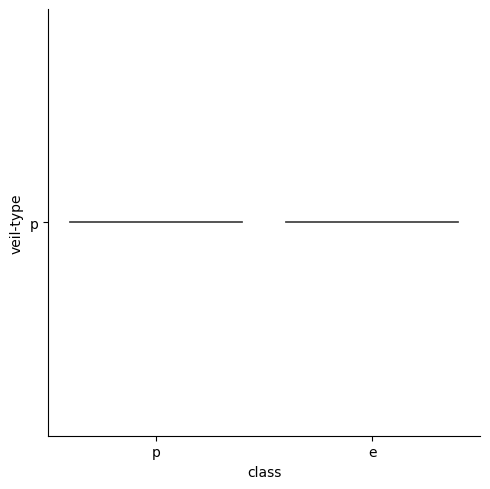

In [10]:
sns.catplot(data=dataset,x='class',y='veil-type',kind='violin',hue='class')

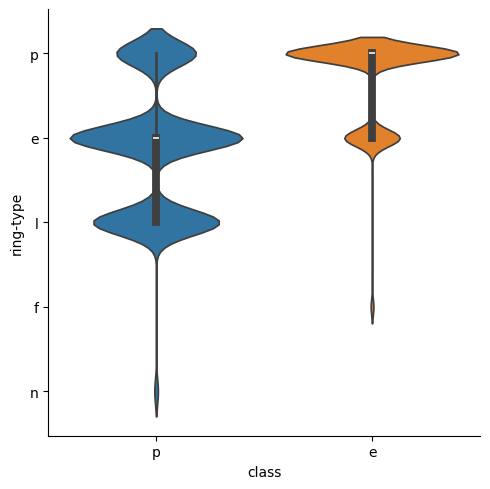

In [11]:
sns.catplot(data=dataset,x='class',y='ring-type',kind='violin',hue='class')

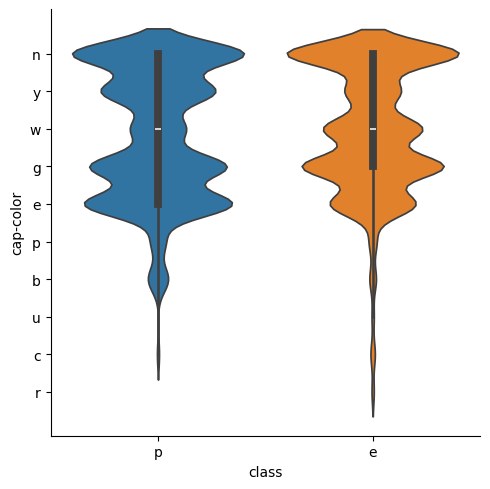

In [12]:
sns.catplot(data=dataset,x='class',y='cap-color',kind='violin',hue='class')

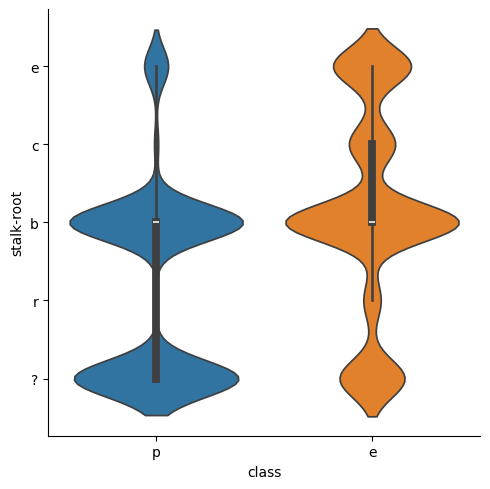

In [13]:
sns.catplot(data=dataset,x='class',y='stalk-root',kind='violin',hue='class')

In [14]:
dataset=dataset.drop('veil-type',axis=1)

In [15]:
dataset.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Data Transformation

In [16]:
encoder=OneHotEncoder()
encoder_df=pd.DataFrame(encoder.fit_transform(dataset.drop('class',axis=1)).toarray())
print (encoder_df)

      0    1    2    3    4    5    6    7    8    9    ...  106  107  108  \
0     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
2     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8119  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
8120  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
8121  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
8122  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.0  0.0   
8123  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   

      109  110  111  112  113  114  115  
0     0.0  0.0  0.0  

In [17]:
dataset['class']=dataset['class'].apply(lambda x: 1 if x=='p' else 0)

## Training the model

In [18]:
x=encoder_df
y=dataset['class']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
bgc=BaggingClassifier(n_estimators=6000)
ada=AdaBoostClassifier(n_estimators=6000)
extra_trees=ExtraTreesClassifier(n_estimators=6000)
gradient=GradientBoostingClassifier(n_estimators=6000)
lr=LogisticRegression(verbose=2000,max_iter=2000)
svc=SVC(kernel='linear')
mlpc=MLPClassifier(hidden_layer_sizes=[16],learning_rate='constant',verbose=True,max_iter=2000,tol=1e-8,early_stopping=False,activation='logistic',batch_size=20,)
clfs={
    'LogisticRegression Classifier': lr,
    'Multi-Layer Perceptron Classifier': mlpc,
    'Bagging Classifier': bgc,
    'AdaBoostClassifier':ada,
    'ExtraTrees Classifier': extra_trees,
    'GradientBoostingClassifier': gradient,
    'Support Vector Classifier': svc
}
for name,clf in clfs.items():
    print(f'Clf: {name}')
    print('Training...')
    clf.fit(xtrain,ytrain)
    ypred=clf.predict(xtest)
    print(f'Accuracy of {name}: {accuracy_score(ytest,ypred)}')
    print(f'Precision of {name}: {precision_score(ytest,ypred)}')
    print(f'Confusion Matrix: \n{confusion_matrix(ytest,ypred)}')
    print('------------------------------------------------------------------------------------------------')

Clf: AdaBoostClassifier
Training...


d:\IDEs\anaconda\envs\mushroom_classification\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoostClassifier: 1.0
Precision of AdaBoostClassifier: 1.0
Confusion Matrix: 
[[843   0]
 [  0 782]]
------------------------------------------------------------------------------------------------
Clf: ExtraTrees Classifier
Training...
Accuracy of ExtraTrees Classifier: 1.0
Precision of ExtraTrees Classifier: 1.0
Confusion Matrix: 
[[843   0]
 [  0 782]]
------------------------------------------------------------------------------------------------
Clf: GradientBoostingClassifier
Training...
Accuracy of GradientBoostingClassifier: 1.0
Precision of GradientBoostingClassifier: 1.0
Confusion Matrix: 
[[843   0]
 [  0 782]]
------------------------------------------------------------------------------------------------
Clf: Support Vector Classifier
Training...
Accuracy of Support Vector Classifier: 1.0
Precision of Support Vector Classifier: 1.0
Confusion Matrix: 
[[843   0]
 [  0 782]]
---------------------------------------------------------------------------------------

In [22]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
new_mlpc=MLPClassifier(max_iter=1000)
clf = GridSearchCV(new_mlpc, parameter_space, n_jobs=-1, cv=3)
clf.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [23]:
print('Best Params found:\n',clf.best_params_)

Best Params found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [27]:
ypred=clf.predict(xtest)
print(f'Accuracy with best params sets is: {accuracy_score(ytest,ypred)}')

Accuracy with best params sets is: 1.0


## Exporting the model

In [28]:
pickle.dump(clf,open('mushroom_model_100','wb'))